# Variational calculation with truncated Hilbert space
# Numerical diagonalization of H in basis of N partocle-in-a-box states


In [6]:
using QuadGK
using LinearAlgebra

Any potential within a box from x=0 tp x=ll can be put here

In [222]:
function potential(x::Float64,ll::Float64)::Float64
    v::Float64=20
    if x > (ll/4) && x < (3*ll/4)
        return v
    else
        return 0
    end
end 



potential (generic function with 1 method)

Particle-in-a-box wave function k defined between `0` and `ll`

In [223]:
function eigenfunc(x::Float64,k::Int,ll::Float64)::Float64
    f=sin(k*x*pi/ll)*(2/ll)^0.5
    return f
end

eigenfunc (generic function with 1 method)

The function to be integrated for the potential-energy matrix elements


In [224]:
function vpsikpsip(x::Float64,k::Int,p::Int,ll::Float64)::Float64
    psik=eigenfunc(x,k,ll)
    psip=eigenfunc(x,p,ll)
    return psik*psip*potential(x,ll)
end

vpsikpsip (generic function with 1 method)



Integrates the function func(x) from x=x2 to x=x2, uses n intervals dx (n+1 grid points)


In [225]:
 function simpson(func,x1::Float64,x2::Float64,n::Int)::Float64
    dx=(x2-x1)/n
    I::Float64=func(x1)+func(x2)
    for i=1:2:n-3
      x=x1+i*dx
      I=I+4*func(x)+2*func(x+dx)
    end 
    I=I+4*func(x2-dx)
    return I*dx/3
 end

simpson (generic function with 1 method)



Makes the Hamiltonian matrix

The commented-out lines are for integration using quadgk() (this turns out to be very slow, use Simpson's method instead)


In [226]:

 function hamiltonian(n::Int,ll::Float64)
    ham=Matrix{Float64}(undef,n,n)
    eps=1e-4
    a=0.5
    x1::Float64=ll/2-a*(ll/2)
    x2::Float64=ll/2+a*(ll/2)
    for p=1:n
       for k=1:n
#          ham[k,p],e = quadgk(x -> vpsikpsip(x,k,p,ll),x1,x2,rtol=eps)
           ham[k,p] = simpson(x -> vpsikpsip(x,k,p,ll),x1,x2,1000)
        end
       ham[p,p] += (0.5*(pi*p/ll)^2)
    end
    return ham
 end

hamiltonian (generic function with 1 method)

Transforms from the eigenvector in the box basis to real space
$$\Psi(x) = c_1 * \psi_1(x) + c_2 * \psi_2(x) + \dots$$

In [227]:
 function psi(v,x)
    nx=length(x)
    ll=x[nx]
    p=zeros(Float64,nx) #Psi(x)
    for j=1:nx
       for i=1:length(v)
          p[j] += v[i]*eigenfunc(x[j],i,ll)
       end
    end
    return p
 end

psi (generic function with 1 method)

In [228]:
n=100   # number of basis states
ll=2.   # box size (between x=0 and x=ll)

h=hamiltonian(n,ll);



Get the eigenvalues and eigenvectors (there is another function eigen() that does both, may be faster)


In [229]:
e=eigvals(h)
v=eigvecs(h);

In [239]:


nx=200                  # grid points (-1) for wave function
dx=ll/nx                # grid spacing for wave function
x=zeros(Float64,nx+1)   # vector holding the grid points for the wave function 
for j=1:nx+1
    x[j]=(j-1)*dx
end

k=1  # The eigenfunction to be graphed (k in 1,...,n)             
println(e[k],"  ",e[k+1])
p=psi(v[:,k],x);



10.658051372904811  10.82933404266933


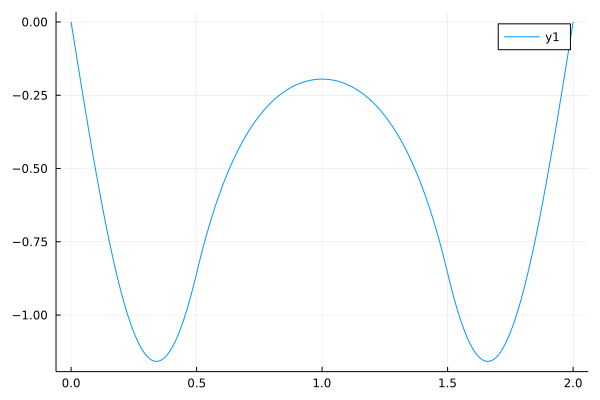

In [240]:
using Plots

plot(x,p )


Perhaps its more instructive to looking at the probability density, $|\Psi(x)|^2$

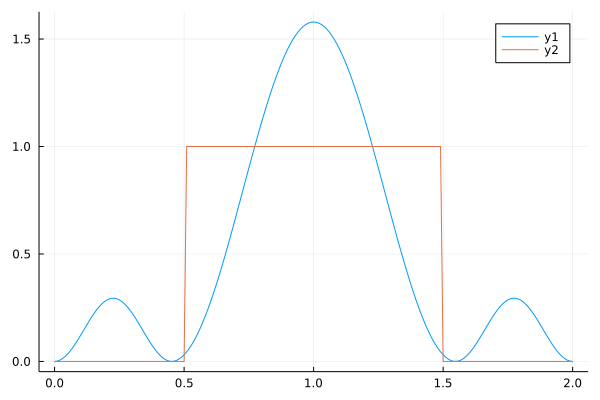

In [238]:
plot(x,abs.(p).^2 )
plot!(x,potential.(x, ll) ./ maximum(abs.(potential.(x, ll)))) #normalized so max(potential)=1

2.0